# The Power of Topological Data Analysis for Machine Learning
### MATH 471 Topology
#### Charles Zhang

## Abstract 

Topological Data Analysis (TDA) applies techniques from algebraic topology to study and extract topological and geometric information on the shape of data \[1\]. By considering geometric and topological features of multi-dimensional data arising from various distance metrics imposed on the data, complex relationships within the data can be preserved and jointly considered. This often leads to better results than using standard analytical tools. This project then aims at harnessing the power of TDA for machine learning. We can combine and compare a wide range of TDA techniques to extract features from images that are usually used separately. This project will introduce several topological preliminary background, especially cubical complexes and their persistent homology which is much more natural for images with 'cube' pixels. Then, for the first part, I discover the shape of the data by the mapper algorithm\[2\]. Visualising and understanding very high dimensional datasets is vital for further understanding more about the nature, fundamental structure and underlying relationships of the data and preparing the data for machine learning algorithms as the preprocess for classifying tasks. Second, This project presents a more general way to use TDA for machine learning tasks on grayscale images by applying various TDA techniques \[3\]. Specifically, this project applies persistent homology to generate a wide range of topological features using a point cloud obtained from an image, its natural grayscale filtration, and different filtrations defined on the binarized image. We show that this topological machine learning pipeline can be used as a highly relevant dimensionality reduction by applying it to the MNIST digits dataset. For the result, we can observe that the trained classifier can classify digit images while reducing the size of the feature set by more than half in comparison with the grayscale pixel value features and maintain similar even higher accuracy as 97%. The digital artifact of this project can be seen [***HERE***](https://zcczhang.github.io/projects/The-Power-of-Topological-Data-Analysis-for-Machine-Learning.html) where the GitHub repository can be seen [***HERE***](https://github.com/zcczhang/TDA-project).


**Keywords:** Topological data analysis, Machine learning, Mapper,  Persistent homology

## 1. Introduction

This section will introduce the preliminary mathematical background of my topic. Topological Data Analysis (TDA) applies techniques from algebraic topology to study and extract topological and geometric information on the ***shape*** of data \[1\]. In this project, I use persistent homology, a tool from TDA that extracts features representing the numbers of connected components, cycles, and voids and their birth and death during an iterative process called a filtration \[4\]. Each of those features is summarized as a point in a persistence diagram. Most commonly used on point clouds, persistent homology can also be used on images, using their voxel structure \[3\]. The mathematical background will be introduced from below.


A **metric** on a set $M$ is a function $d: M \times M \rightarrow[0, \infty),$ where $[0, \infty)$ denotes the set of non-negative real numbers. It is required that, for any points $x, y, z$ in $M, d(x, y)=d(y, x)$ $d(x, x)=0,$ and $d(x, z) \leq d(x, y)+d(y, z) .$ A metric on $M$ thus provides a way to measure distances between points of $M$ and we refer to the pair $(M, d)$ as a **metric space**. In TDA the initial input is given by a dataset with a chosen metric on its points. We refer to such inputs also as **point clouds**.

When a point cloud is distributed unevenly, geometric structures called **simplicial complexes** derived from the data can yield important information about dataset's structure. Given a dataset $M,$ a simplicial complex on $M$ is a collection of non-empty subsets of $M,$ called **simplices**, such that any subset of a simplex is also a simplex. A k-simplex $\sigma$ is the convex hull of $k + 1$ affinely independent points shown in the figure below. A 0-simplex is also called a vertex and a 1-simplex an edge. A finite simplicial complex is a finite collection of simplices satisfying some conditions. Its dimension is the maximal dimension of its simplices.

![](https://cdn.mathpix.com/snip/images/2FR3uvSPWNiAmKXRoClrqqJS92A8zYG719eDVnO5PF8.original.fullsize.png)

In mathematical speaking, a set $\left\{v_{0}, \ldots, v_{n}\right\} \subset \mathbb{R}^{N}$ is said to be geometrically independent if the vectors $\left\{v_{0}-v_{1}, \ldots, v_{0}-v_{n}\right\}$ are linearly independent. In this case, we refer to their convex closure as a simplex, explicitly
$$
\left[v_{0}, \ldots, v_{n}\right]=\left\{\sum c_{i}\left(v_{0}-v_{i}\right) \mid c_{1}+\cdots+c_{n}=1, c_{i} \geq 0\right\}
$$
and to $n$ as its dimension. The $i$ -th face of $\left[v_{0}, \ldots, v_{n}\right]$ is defined by
$$
d_{i}\left[v_{0}, \ldots, v_{n}\right]=\left[v_{0}, \ldots, \hat{v}_{i}, \ldots, v_{n}\right]
$$
where $\hat{v}_{i}$ denotes the absence of $v_{i}$ from the set.
A simplicial complex $X$ is a finite union of simplices in $\mathbb{R}^{N}$ satisfying that every face of a simplex in $X$ is in $X$ and that the non-empty intersection of two simplices in $X$ is a face of each. 

From a dataset, we can obtain a simplicial complex using the **Vietoris-Rips** construction. For $X$, a point cloud in $\mathbb{R}^{n}$, its Vietoris-Rips complex of parameter $\varepsilon$, denoted by $V R(X, \varepsilon)$, is the simplicial complex with vertex set $X$ and where $\left\{v_{0}, v_{1}, \ldots, v_{k}\right\}$ spans a $k$ -simplex if and only if if all pairwise distances in the subset are less than or equal to $\varepsilon$, explicitly, 
$$
V R(X, \varepsilon)=\left\{\left[v_{0}, \ldots, v_{n}\right] \mid \forall i, j, d\left(v_{i}, v_{j}\right) \leq \varepsilon\right\}
$$
It is also worth noting that $VR(X, \varepsilon)\subseteq VR(X, \varepsilon')$ for $\varepsilon \leq \varepsilon'$, which is apparently, as larger set will include vertices with larger pairwise distances.

Two datapoints at most distance $\varepsilon$ apart create a simplex, which can be geometrically described as an edge. These Vietoris-Rips complexes encode geometric features of the data such as connected components, or clusters, and holes. The Vietoris-Rips filtration can also be applied directly
to images, by seeing the pixels as a point cloud in a two dimensional Euclidean space. However, a point cloud is not the most natural representation of an image. Images are made of pixels, or voxels in higher dimension, and thus have a natural grid structure that we can exploit. Hence, we use cubical complexes in place of simplicial complexes, extending to the context of persistent homology.

In imagery, the standard sampling of an image is achieved via a cubic tessellation. In 2D image case, this leads to a 2D image array. If we associate each entry of the array with a unit square with vertices in an integer lattice, we obtain a complex of unit squares commonly called **pixels**. Any two pixels are either disjoint or intersect through a common edge or a common vertex. This complex is called a 2D cubical complex. If the squares are represented geometrically in the plane, the representation is called the geometric realization of the cubical complexin the plane. The simplicial theory would require subdividing each pixel into union of two triangles and hence increasing the complexity of data. But the approach using **cubical theory will deal directly with this cubical structure**. The same observations can be made for 3D images which lead to a 3D-cubical complexof voxels.
One need not have to confine himself to 2D and 3D complexes but consider the general setting of a multidimensional
image array and correspondingly a multidimensional cubical complex. In order to define the algebraic structure of
a chain complexmentioned in the introduction, we need a more general definition of a cube in a multidimensional
space \[5\].

An elementary interval $I_{a}$ is a subset of $\mathbb{R}$ of the form $[a, a+1]$ or $[a, a]=\{a\}$ for some $a \in \mathbb{R}$. These two types are called respectively **non-degenerate** and **degenerate**. To a non-degenerate elementary interval we assign two degenerate
elementary intervals
$$
d^{+} I_{a}=[a+1, a+1] \quad \text { and } \quad d^{-} I_{a}=[a, a]
$$
An elementary cube is a subset of the form
$$
I_{a_{1}} \times \cdots \times I_{a_{N}} \subset \mathbb{R}^{N}
$$
where each $I_{a_{i}}$ is an elementary interval. We refer to the total number of its nondegenerate factors $I_{a_{k_{1}}}, \ldots, I_{a_{k n}}$ as its dimension and, assuming
$$
a_{k_{1}}<\cdots<a_{k_{n}}
$$
we define for $i=1, \ldots, n$ the following two elementary cubes
$$
d_{i}^{\pm} I^{N}=I_{a_{1}} \times \cdots \times d^{\pm} I_{a_{k_{i}}} \times \cdots \times I_{a_{N}}
$$

The simple examples of cubes of dimension 0, 1, 2, and 3 are shown below

![](https://cdn.mathpix.com/snip/images/7kzJWzfB4Ld4EQW8aQOsIJwpCpkR-hzU-3N3ceKtVmU.original.fullsize.png)

A **cubical complex** is a finite set of elementary cubes of $\mathbb{R}^{N},$ and a subcomplex of $X$ is a cubical complex whose elementary cubes are also in $X$. This is quite similar with simplicial complex, and more generally, every face of a cube in cubical complex is also in the cubical complex; and the intersection of any two cubes of cubical complex is either empty or a common face. 

Most commonly used on point clouds, persistent homology can also be used on images, using their voxel structure. One can define a filtration based on techniques from image processing, like dilation or erosion for example, and generate features that are intuitive, though otherwise difficult to extract. It has already been successfully applied to classification tasks in \[some references\]


***@TODO: fully explanations***

- introduction of TDA
    - persistent homology, a tool from TDA that extracts features representing the numbers of connected components, cycles, and voids and their birth and death during an iterative process called a filtration
    - How to consider images as cubical complexes
- introduction of classification methods of machine learning(maybe included deep learning) algorithms
- introduction of dataset
    - MNIST
    - maybe something else like dataset of Chinese characters, skin cancers images, etc.


## 2. Applications
### 2.1 Shape Analysis

Topological data analysis(TDA) produces an abstract representation of the data, a simplicial complex(***TODO: the definition is illustrated above?***) summary of the original data. This complex could be said to represent the shape of the data, or a higher order representation of the data. The complex does not come with coordinates and should be considered a combinatorial representation of topological (and geometric) features of the original space.

A topological network (i.e. a graph) produced by TDA represents data by grouping similar data points into nodes, and connecting those nodes by an edge if the corresponding collections have a data point in common. Because each node represents multiple data points, the network gives a compressed version of extremely high dimensional datasets.\[some reference\]

TDA seeks to compare or understand global invariants of a dataset (persistent homology) that **characterise the shape of the data, or partition data for further applications of machine learning** \[some reference e.g. (Morse-Smale clustering, Mapper algorithm)\]. TDA is a relatively recent technique, popularized in a landmark paper by Gunnar Carlsson in 2009.

In this section, I make use of the mapper algorithm that uses TDA on our MNIST digits dataset which is discussed in section 2.1.2, implemented by the [Kepler Mapper Library](https://kepler-mapper.scikit-tda.org/en/latest/) in Python.

#### 2.1.1 load data

In [5]:
# Import Libraries
import numpy as np
import pandas as pd
import kmapper as km
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline, make_pipeline, make_union
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from gtda.plotting import plot_heatmap
from gtda.images import Binarizer, RadialFiltration, HeightFiltration
from gtda.homology import CubicalPersistence
from gtda.diagrams import Scaler, HeatKernel, Amplitude, PersistenceEntropy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
# Hide the in[], out[], and ordering of the jupyter notebook
from IPython.core.display import display,HTML
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))
#  display(HTML('<style>.prompt{width: 2px; min-width: 2px; visibility: visible}</style>'))
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (70000, 784), y shape: (70000,)


There are 70,000 images, where each image has 784 features that represent pixel intensity. Several randomly selected examples of the reshaped digits images in the dataset are shown below.

<Figure size 432x288 with 0 Axes>

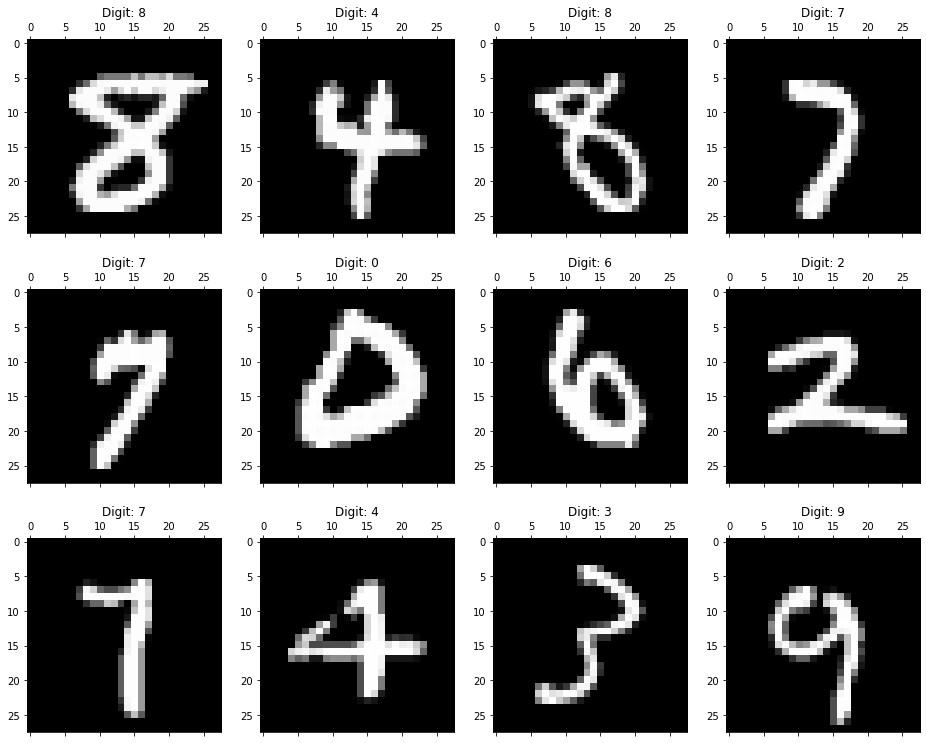

In [4]:
# Convert feature matrix X and target vector y to a pandas dataframe.
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
# For reproducability of the input digis image
np.random.seed(42)
# Take random subset of digit images so we get a range of examples for each digit
rndperm = np.random.permutation(df.shape[0])
# Print examples
plt.gray()
fig = plt.figure( figsize=(16,13) )
for i in range(0,12):
    ax = fig.add_subplot(3,4,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

#### 2.1.2 Mapper

**Mapper** is a combination of dimensionality reduction, clustering and graph networks techniques used to get higher level understanding of the structure of data. For my understanding, it is mainly used for, visualising the shape of data through a particular lens, detecting clusters and interesting topological structures which traditional methods fail to find, and selecting features that best discriminate data and for model interpretability.\[2\].

Mapper models data as a graph by refining standard clustering algorithms with topological ideas. Namely, global clustering of the data may be inefficient, especially when the data’s distance metric is not Euclidean. Instead, data is partitioned according to some intervals of real numbers $\mathbb{R}$. These intervals are created by using a **filter function** $f$ meaning a function on data under which each point has exactly one value on some interval. Then, **local clustering** is achieved based on those datapoints which map to the same interval. The clusters make nodes of the Mapper graph. Intervals are overlapping by some predefined amount. Clusters with non-empty intersection of points mapping to the overlap of two adjacent intervals are then joined by an edge in the graph. If three or more
clusters of points have non-empty intersection mapping to the same overlap of intervals,
2- and higher simplices can become present in the Mapper graph. The Mapper construction thus creates a simplicial complex of clusters representing the structure of data under the chosen filtering function. This modification to standard clustering gives more insight into the global structure of data through simplicial constructions as explained above.

Combining together, given a dataset of points, the basic steps behind Mapper are as follows:
1. Map to a lower-dimensional space using a filter function $f,$ or lens. Common choices for the filter function include projection onto one or more axes via principal component analysis (PCA) or density-based methods.
2. Construct a cover $\left(U_{i}\right)_{i \in I}$ of the projected space typically in the form of a set of overlapping intervals which have constant length.
3. For each interval $U_{i}$ cluster the points in the preimage $f^{-1}\left(U_{i}\right)$ into sets $C_{i, 1}, \ldots, C_{i, k_{i}}$
4. Construct the graph whose vertices are the cluster sets and an edge exists between two vertices if two clusters share some points in common.

The result is a compressed graph representation of the dataset representing well its structure. High flexibility is left in this procedure to the data scientist for fine tuning: the choice of the lens, the cover and the clustering algorithm. The figure below gives a simple example of Mapper algorithm illustrated above.

![](https://cdn.mathpix.com/snip/images/Nek4UtPFsSYfzWeWMDW0PlIcgBWAsbMxf53xhECVras.original.fullsize.png)

Next, we implement the code in Python to see what the shape of our dataset MNIST looks like.

In [29]:
data, labels = datasets.load_digits().data, datasets.load_digits().target

# Select similar subset of dataset as previous
N = 10000
df_subset2 = df.loc[rndperm[:N],:].copy()
df_subset2 = df_subset2.reset_index()
data_subset2 = df_subset2[feat_cols].values
# Initialize to use t-SNE with 2 components (reduces data to 2 dimensions). Also note high overlap_percentage.
mapper = km.KeplerMapper(verbose=2)

# Fit and transform data
projected_data = mapper.fit_transform(data_subset2,
                                      projection=sklearn.manifold.TSNE())

# Create the graph (we cluster on the projected data and suffer projection loss)
graph = mapper.map(projected_data,
                   clusterer=sklearn.cluster.DBSCAN(eps=0.3, min_samples=15),
                   cover=km.Cover(35, 0.2))

# Create the visualizations (increased the graph_gravity for a tighter graph-look.)
# Tooltips with the target y-labels for every cluster member
mapper.visualize(graph,
                 title="Handwritten digits Mapper",
                 path_html="tda_mnist_digits.html",
                 color_function=df_subset2['y'].values,
                 custom_tooltips=df_subset2['y'].values)

![](https://cdn.mathpix.com/snip/images/OPz38jMyEGsXrjUMsWy02W2P5nHpV0CNK2hLB2eaC5A.original.fullsize.png)

The figure above shows distinct clusters of 'nodes', each of which relates to multiple data points, as well as clusters that appear to have clear 'connecting points' to other clusters. Each node is coloured in relation to a particular digit. Given there are far less points on this visualisation, it is easier to see not only the distinct groupings but the specific points at which some of these groupings connect with each other.

In fact the network is rendered by *Kepler Mapper Library* as a fully interactive & animated web page where one can move around nodes and structures, and click on individual nodes to discover what data points (and digits) each node is made up of. An interactive version of this topological network on this [PAGE](https://zcczhang.github.io/projects/tda_mnist_digits.html) illustrates the overall network structure is also the output of the code above. 

The figure below is an annotated version of the network diagram with clusters that relate to each digit.

![](https://github.com/zcczhang/zcczhang.github.io/blob/master/images/tda1.png?raw=true)

From this figure, it is shown that most of "0", ”1“, ”2” and “6” are completely distinct groups, which suggests that most images for these digits have a fundamentally distinguished morphology, and therefore we could directly classify these numbers when we just put this clusters as features into machine learning classifiers. 

Next, I discover the digit groups, which are connecting nodes sharing commonality like "4""7""9", by focusing on "A" and "B" node illustrated in the figure above. 

The point A which is a connecting point between "4", "7", and "9" where B includes "5", "3", and "8", the visualization of digits belonging to node A and B is shown below respectively.

<Figure size 432x288 with 0 Axes>

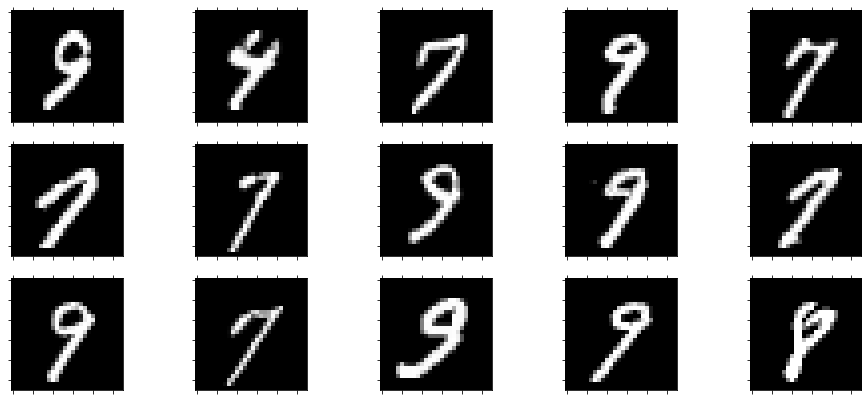

In [33]:
# Node A(Digits: 4/7/9)
# cube469_cluster0
clusterB = graph.get("nodes").get("cube469_cluster0")
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df_subset2.loc[clusterB[i],'label'])) )
    ax.matshow(df_subset2.loc[clusterB[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

<Figure size 432x288 with 0 Axes>

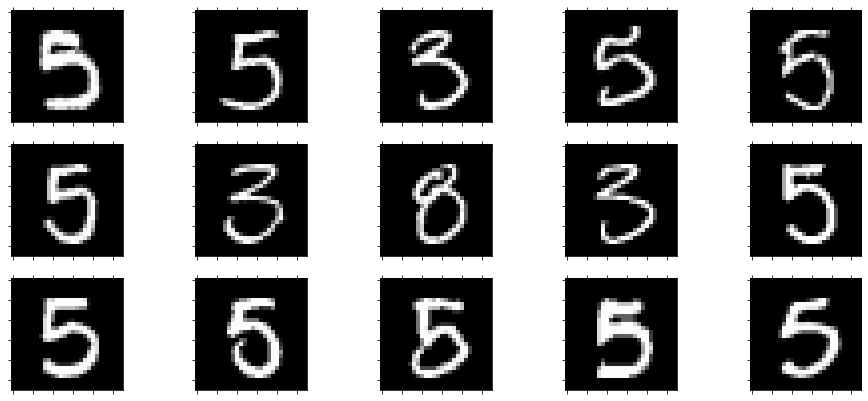

In [32]:
# Node B (Digits: 3/5/8)
# cube620_cluster0
clusterA = graph.get("nodes").get("cube620_cluster0")
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df_subset2.loc[clusterA[i],'label'])) )
    ax.matshow(df_subset2.loc[clusterA[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

From the figure above, the morphological similarities can be easily seen.

Therefore, this topological network could be used in several different ways. For example, we could use it as a tool to further understand more about the nature, fundamental structure and underlying relationships of the data as we have above. We could also use it and the clusters it has produced as input to a machine learning algorithm helping with  select features that best discriminate data to classify images.

### 2.2 Feature Extraction

In this section, I analyze how TDA help with feature extraction for classification tasks. And I use classifying handwritten digits with the data set MNIST to illustrate the whole procedure.

#### 2.2.1 Create train and test set

For the MNIST data set I loaded before, create train and test sets with the proportion 6:1 in 70000 images in the dataset for future using.

In [7]:
train_size, test_size = 60000, 10000

# Reshape to (n_samples, n_pixels_x, n_pixels_y)
X = X.reshape((-1, 28, 28))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_size, test_size=test_size, stratify=y, random_state=666
)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28), y_train shape: (60000,)
X_test shape: (10000, 28, 28), y_test shape: (10000,)


#### 2.2.2 Filtration
Filtrations of cubical complexes are built from binary images consisting of only black and white pixels, so the first step is to convert greyscale images to binary by applying a threshold on each pixel value via the Binarizer transformer provided by [giotto-tda](https://giotto-ai.github.io/gtda-docs/latest/library.html) library in Python. The example of the binary image of ”0“ in the train set is shown below.

In [23]:
# Pick out index of first 8 image
im0_idx = np.flatnonzero(y_train == "0")[0]
# Reshape to (n_samples, n_pixels_x, n_pixels_y) format
im0 = X_train[im0_idx][None, :, :]
binarizer = Binarizer(threshold=0.4)
im0_binarized = binarizer.fit_transform(im0)
binarizer.plot(im0_binarized)

There are many kinds of filtration, including binary，height, radial, density, dilation, erosion, and signed filtration\[some reference\]. The example of radial filtration which assigns to each pixel a value corresponding to its distance from a predefined center of the image is shown below, with (radial, center) = (20, 6). This is reproducing the filtered image from the MNIST article: A Topological "Reading" Lesson: Classification of MNIST using TDA ([arXiv](https://arxiv.org/abs/1910.08345)), where "8" is used as the example digit in the article, and 0 in this project.

***TODO: lots of Mathematical background, meaning, reasons why we use filration.***


In [7]:
radial_filtration = RadialFiltration(center=np.array([20, 6]))
im0_filtration = radial_filtration.fit_transform(im0_binarized)
radial_filtration.plot(im0_filtration, colorscale="jet")

Then, the result shows transforming the binary image of "0" into a greyscale one, where the pixel values increase as we move from the upper-right to bottom-left of the image. These pixel values can be used to define a filtration of cubical complexes, ***TODO mathematical meaning & languages***, and then it will be straightforward to calculate the corresponding persistence diagram, illustrated in the next subsection.

#### 2.2.3 Persistence Diagram

Inspired by \[a reference\] defining the amplitude of a persistence diagram as its distance to the empty diagram, which contains only the diagonal points. I use two metrics of the Wasserstein and Bottleneck distances, and three kernels of Betti curves, persistence landscapes, and heat kernel. For these procedures, this section demonstrates the persistence diagram first.

We can clearly see one persistent generators $H_1$ corresponding to the loops in the digit “0”, along with a single $H_0$ generator corresponding to the connected components. And it makes sense by the shape of the "0" a connected loop!

In [8]:
cubical_persistence = CubicalPersistence(n_jobs=-1)
im0_cubical = cubical_persistence.fit_transform(im0_filtration)
cubical_persistence.plot(im0_cubical)

As a postprocessing step, it is often convenient to rescale the persistence diagrams.

In [9]:
scaler = Scaler()
im0_scaled = scaler.fit_transform(im0_cubical)
scaler.plot(im0_scaled)

Vectorial representation of the persistence diagram would be the main part that how to use the persistence diagram to obtain features used in machine learning algorithms. To do so, an example of the heat kernel representation of a diagram in the homology dimension 1 is given. 

***TODO explain "convolve", "Gaussian kernel"***
***TODO illustration of other types of representation as well? e.g. barcode?***

In [10]:
heat = HeatKernel(sigma=.15, n_bins=60, n_jobs=-1)
im0_heat = heat.fit_transform(im0_scaled)
# Visualise the heat kernel for H1
heat.plot(im0_heat, homology_dimension_idx=1, colorscale='jet')

#### 2.2.4 Supervised Learning

To do the classification tasks, classifying hand-written digits in this case, I build the pipeline consisting all steps for the supervised learning. For better illustration, I first build a pipeline for all steps I showed above for a single digit "0" in this case and see the final “amplitude” output shown below, which is working!

In [11]:
steps = [
    ("binarizer", Binarizer(threshold=0.4)),
    ("filtration", RadialFiltration(center=np.array([20, 6]))),
    ("diagram", CubicalPersistence()),
    ("rescaling", Scaler()),
    ("amplitude", Amplitude(metric="heat", metric_params={'sigma':0.15, 'n_bins':60}))
]

heat_pipeline = Pipeline(steps)

In [12]:
im0_pipeline = heat_pipeline.fit_transform(im0)
im0_pipeline

array([[0.02434853, 1.49944247]])

Inspired by the article by Garin and Tauzin, I extract a wide variety of features over the whole training set. To keep things simple, augment the radial filtration with a height filtration $\mathcal{H}$, defined by choosing a unit vector $v\in\mathbb{R}^2$ in some direction and assigning values $\mathcal{H}(p) = <p,v>$ based on the distance of $p$ to the hyperplane defined by $v$. Also, I pick a uniform set of directions and centers for our filtrations as shown in the figure below. Features from persistence diagrams by using persistence entropy and a broad set of amplitudes mentioned in section ***TODO*** above are generated then. Putting it all together yields the following pipeline:

In [13]:
direction_list = [[1, 0], [1, 1], [0, 1], [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1]]

center_list = [
    [13, 6],
    [6, 13],
    [13, 13],
    [20, 13],
    [13, 20],
    [6, 6],
    [6, 20],
    [20, 6],
    [20, 20],
]

# Creating a list of all filtration transformer, we will be applying
filtration_list = (
    [
        HeightFiltration(direction=np.array(direction), n_jobs=-1)
        for direction in direction_list
    ]
    + [RadialFiltration(center=np.array(center), n_jobs=-1) for center in center_list]
)

# Creating the diagram generation pipeline
diagram_steps = [
    [
        Binarizer(threshold=0.4, n_jobs=-1),
        filtration,
        CubicalPersistence(n_jobs=-1),
        Scaler(n_jobs=-1),
    ]
    for filtration in filtration_list
]

# Listing all metrics we want to use to extract diagram amplitudes
metric_list = [
    {"metric": "bottleneck", "metric_params": {}},
    {"metric": "wasserstein", "metric_params": {"p": 1}},
    {"metric": "wasserstein", "metric_params": {"p": 2}},
    {"metric": "landscape", "metric_params": {"p": 1, "n_layers": 1, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 1, "n_layers": 2, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 2, "n_layers": 1, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 2, "n_layers": 2, "n_bins": 100}},
    {"metric": "betti", "metric_params": {"p": 1, "n_bins": 100}},
    {"metric": "betti", "metric_params": {"p": 2, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 1, "sigma": 1.6, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 1, "sigma": 3.2, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 2, "sigma": 1.6, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 2, "sigma": 3.2, "n_bins": 100}},
]

#
feature_union = make_union(
    *[PersistenceEntropy(nan_fill_value=-1)]
    + [Amplitude(**metric, n_jobs=-1) for metric in metric_list]
)

tda_union = make_union(
    *[make_pipeline(*diagram_step, feature_union) for diagram_step in diagram_steps],
    n_jobs=-1
)

In [15]:
X_train_tda = tda_union.fit_transform(X_train)
X_train_tda.shape

(60, 476)

Then, we get 476 topological features for each image, which is significantly reduced from 784, and then I trained a random forest classifier

(***TODO: introduce random forest tree***)

on the training set, and achieve accuracies above 96%, which is high enough to conclude that using topological features generated above  reduce the feature

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_tda, y_train)

X_test_tda = tda_union.transform(X_test)
rf.score(X_test_tda, y_test)from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_tda, y_train)

X_test_tda = tda_union.transform(X_test)
print("Accuracy: ", str(rf.score(X_test_tda, y_test)))

Accuracy: 0.97

It is also worth noting that if we only choose 6000 images for training, the accuracy will also achieve 90%, which is better for using some of other classifiers with the same size of training set. Therefore, using topological features will also have the potential to reduce the dimension of datasets for classification tasks; or more intuitively, the classifying agent will "learn" faster. The following figure gives a glance at an example of the wrong prediction of 4 as 9, which is also somewhat hard to recognize by human eyes as well.

![](https://cdn.mathpix.com/snip/images/AhF77BJN6kH6gRV5vuaJ7lwgwP5l4mNYSJjQ4Kl7Z2k.original.fullsize.png)

In comparison with other works using the same random forest classifier to train a model for digits recognizer at MNIST dataset without extracting the topological features will achieve the accuracy around 94% to 96% \[reference code\]\[reference RFT\]. I implement the code for this shown below, which achieves an accuracy around 96.6% Therefore, we can conclude that not only my approach in this project reduce the size of the feature sets significantly compared to grayscale pixel value features, but also maintain a high accuracy that is above than most of works using the same classifiers fed grayscale pixel value features.

In [4]:
train_file = pd.read_csv('train.csv')
test_file = pd.read_csv('test.csv')
num_train,num_validation = int(len(train_file)*0.8),int(len(train_file)*0.2)
x_train, y_train = train_file.iloc[:num_train,1:].values,train_file.iloc[:num_train,0].values
x_validation,y_validation = train_file.iloc[num_train:,1:].values,train_file.iloc[num_train:,0].values
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
prediction_validation = clf.predict(x_validation)
print("Accuracy: " + str(accuracy_score(y_validation,prediction_validation)))

Accuracy: 0.9660714285714286


We have seen the benefit for using TDA for machine learning. However, extracting topological features as well as the whole machine learning pipeline shown above may take longer time to generate features. Nevertheless, as the dataset I used in this project is relatively 'tiny' comparing with the real world data which may includes color features and much more complicated morphological features in 2D even 3D, reducing a significant number of features while matainning a high accuracy for machine learning, including state-of-the-art deep learning algorithms have a vital meaning and potential.

### 3. Conclusion and Future Steps

In this project, ***TODO: conclusion for mapper***

This project combined a wide range of different TDA techniques for images based on different filtrations and diagram features. This project shows that machine learning algorithms feeded by features generated by TDA techniques are able to classify MNIST digits using half less features than the pixel values, while maintaining the accuracy. As a result, TDA techniques provide powerful dimensionality reduction algorithms for images. Combining machine learning and TDA into a generic pipeline which gathers a wide range of TDA techniques was shown to be a powerful approach to understand the underlying characteristic shapes on the images of a dataset, especially using height, radial, and our density filtrations. Moreover, one can easily validate and support one’s choice of topological features for novel datasets as well.

***TODO***

### Bibliography

\[1\] G. Carlsson, “Topology and data,” Bull. Amer. Math. Soc. (N.S.), vol. 46, no. 2, pp. 255–308, 2009.

\[2\] Singh, Gurjeet, Facundo Mémoli, and Gunnar E. Carlsson. "Topological methods for the analysis of high dimensional data sets and 3d object recognition." SPBG 91 (2007): 100.

\[3\] Garin, Adélie, and Guillaume Tauzin. "A Topological" Reading" Lesson: Classification of MNIST using TDA." 2019 18th IEEE International Conference On Machine Learning And Applications (ICMLA). IEEE, 2019.

\[4\] H. Edelsbrunner and J. Harer, “Persistent homology—a survey,” in Surveys on discrete and computational geometry, ser. Contemp. Math. Amer. Math. Soc., Providence, RI, 2008, vol. 453, pp. 257–282.

\[5\] Ziou, Djemel, and Madjid Allili. "Generating cubical complexes from image data and computation of the Euler number." Pattern Recognition 35, no. 12 (2002): 2833-2839.

\[reference code\] vneogi199, Handwritten-Digit-Recognition-Using-Random-Forest, accuracy: 94.2%, https://github.com/vneogi199/Handwritten-Digit-Recognition-Using-Random-Forest

\[reference random forest\] Bernard, Simon, Sébastien Adam, and Laurent Heutte. "Using random forests for handwritten digit recognition." In Ninth International Conference on Document Analysis and Recognition (ICDAR 2007), vol. 2, pp. 1043-1047. IEEE, 2007.